In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [125]:
four_lobe_1000_random = pd.read_csv("/Users/jerryhuang/Documents/PIPpolarization/data/4_lobe_test_1000runs_1.csv")
four_lobe_500_random = pd.read_csv("/Users/jerryhuang/Documents/PIPpolarization/data/4_lobe_test_1000runs_2.csv")

## Data cleaning and processing

In [129]:
lobe_data = four_lobe_500_random.copy()
# lobe_data = lobe_data[lobe_data['Average System X'] < 1.0]
lobe_data.head()

,Total Kinase,Total Phosphatase,Timestep,Patch Length,dPIP,alphaEnzyme,k_mkon,k_koff,p_mkon,p_koff,...,p_mkcat,p_mKm,Kinase in Solution,Phosphatase in Solution,Average System X,Average Dendrite 1 X,Average Dendrite 2 X,Average Dendrite 3 X,Average Dendrite 4 X,Average All Dendrites X
0,148.391699,102.017349,0.01,0.5,3.054060,0.264500,0.276989,0.975621,0.092838,0.203183,...,20.018600,0.691381,145,39,0.554348,0.535424,0.747369,0.406810,0.270824,0.490676
1,46.119672,489.005416,0.01,0.5,4.310107,0.218730,0.573078,0.538458,0.073467,0.331140,...,29.460776,0.307814,15,353,0.578320,0.530642,0.688316,0.339394,0.192123,0.436014
2,811.498184,526.279361,0.01,0.5,4.166923,0.306474,0.202088,0.921357,0.071986,0.214774,...,13.354357,0.971677,1058,260,0.580734,0.513598,0.672161,0.330461,0.188633,0.427429
3,700.276242,909.528434,0.01,0.5,3.392294,0.342737,0.432570,0.597549,0.047918,0.261973,...,18.689855,0.270486,252,831,0.584217,0.503090,0.628181,0.342139,0.194066,0.418517
4,819.618973,822.286912,0.01,0.5,3.738243,0.230398,0.362710,0.870492,0.036327,0.350160,...,18.329880,0.565729,554,1147,0.586910,0.517985,0.628350,0.337031,0.201467,0.420547


In [130]:
lobe_data.shape

(500, 22)

In [131]:
lobe_data.describe()

,Total Kinase,Total Phosphatase,Timestep,Patch Length,dPIP,alphaEnzyme,k_mkon,k_koff,p_mkon,p_koff,...,p_mkcat,p_mKm,Kinase in Solution,Phosphatase in Solution,Average System X,Average Dendrite 1 X,Average Dendrite 2 X,Average Dendrite 3 X,Average Dendrite 4 X,Average All Dendrites X
count,500.000000,500.000000,500.00,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,502.364445,506.477788,0.01,0.5,3.970138,0.261140,0.381792,0.629678,0.062616,0.251826,...,18.464711,0.639940,329.254000,457.240000,0.583005,0.597676,0.614565,0.650693,0.631224,0.623564
std,285.025209,284.815405,0.00,0.0,0.574773,0.085277,0.128697,0.216467,0.021299,0.083596,...,6.255792,0.215569,326.688151,324.205084,0.138410,0.246107,0.273326,0.259732,0.233506,0.164464
min,11.008957,15.184820,0.01,0.5,3.007259,0.101335,0.151530,0.251943,0.025025,0.100058,...,7.543507,0.250632,1.000000,3.000000,0.347873,0.009112,0.042696,0.051785,0.108002,0.262127
25%,253.307700,253.446044,0.01,0.5,3.475814,0.185162,0.272492,0.430011,0.044543,0.186919,...,13.234774,0.452013,125.750000,176.000000,0.484079,0.409581,0.388717,0.432041,0.447769,0.507455
50%,496.190909,498.062360,0.01,0.5,3.941376,0.273169,0.376638,0.633370,0.062657,0.250419,...,18.845418,0.647876,233.000000,388.000000,0.563777,0.581315,0.626691,0.650433,0.644844,0.613934
75%,731.836443,750.634233,0.01,0.5,4.482799,0.333300,0.496449,0.824905,0.081048,0.326656,...,23.788752,0.821735,438.250000,693.000000,0.648488,0.809159,0.868139,0.892933,0.821214,0.719855
max,998.714759,999.785680,0.01,0.5,4.998280,0.399909,0.598857,0.999629,0.099974,0.399158,...,29.948031,0.999419,2692.000000,1646.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
params = lobe_data.iloc[:, :14]
params.head()

,Total Kinase,Total Phosphatase,Timestep,Patch Length,dPIP,alphaEnzyme,k_mkon,k_koff,p_mkon,p_koff,k_mkcat,k_mKm,p_mkcat,p_mKm
0,148.391699,102.017349,0.01,0.5,3.054060,0.264500,0.276989,0.975621,0.092838,0.203183,5.210837,3.505467,20.018600,0.691381
1,46.119672,489.005416,0.01,0.5,4.310107,0.218730,0.573078,0.538458,0.073467,0.331140,18.410642,2.796511,29.460776,0.307814
2,811.498184,526.279361,0.01,0.5,4.166923,0.306474,0.202088,0.921357,0.071986,0.214774,18.554376,3.501099,13.354357,0.971677
3,700.276242,909.528434,0.01,0.5,3.392294,0.342737,0.432570,0.597549,0.047918,0.261973,14.526665,1.378773,18.689855,0.270486
4,819.618973,822.286912,0.01,0.5,3.738243,0.230398,0.362710,0.870492,0.036327,0.350160,11.904596,1.537820,18.329880,0.565729


In [133]:
result = lobe_data.iloc[:, 14:]
result.head()

,Kinase in Solution,Phosphatase in Solution,Average System X,Average Dendrite 1 X,Average Dendrite 2 X,Average Dendrite 3 X,Average Dendrite 4 X,Average All Dendrites X
0,145,39,0.554348,0.535424,0.747369,0.406810,0.270824,0.490676
1,15,353,0.578320,0.530642,0.688316,0.339394,0.192123,0.436014
2,1058,260,0.580734,0.513598,0.672161,0.330461,0.188633,0.427429
3,252,831,0.584217,0.503090,0.628181,0.342139,0.194066,0.418517
4,554,1147,0.586910,0.517985,0.628350,0.337031,0.201467,0.420547


In [134]:
for i in range(4):
    result['Polarization Index ' + str(i + 1)] = (result['Average Dendrite ' + str(i + 1) + ' X'] / 
                                        (result['Average Dendrite ' + str(i + 1) + ' X'] 
                                         + result['Average System X'])
                                       )
result.head()

,Kinase in Solution,Phosphatase in Solution,Average System X,Average Dendrite 1 X,Average Dendrite 2 X,Average Dendrite 3 X,Average Dendrite 4 X,Average All Dendrites X,Polarization Index 1,Polarization Index 2,Polarization Index 3,Polarization Index 4
0,145,39,0.554348,0.535424,0.747369,0.406810,0.270824,0.490676,0.491317,0.574141,0.423250,0.328203
1,15,353,0.578320,0.530642,0.688316,0.339394,0.192123,0.436014,0.478503,0.543420,0.369825,0.249366
2,1058,260,0.580734,0.513598,0.672161,0.330461,0.188633,0.427429,0.469326,0.536486,0.362668,0.245180
3,252,831,0.584217,0.503090,0.628181,0.342139,0.194066,0.418517,0.462694,0.518131,0.369338,0.249352
4,554,1147,0.586910,0.517985,0.628350,0.337031,0.201467,0.420547,0.468809,0.517050,0.364776,0.255547


## Data visualization and exploritory analysis

#### Distributions

(array([14., 31., 39., 57., 51., 57., 62., 64., 56., 69.]),
 array([0.10800207, 0.19720186, 0.28640166, 0.37560145, 0.46480124,
        0.55400104, 0.64320083, 0.73240062, 0.82160041, 0.91080021,
        1.        ]),
 <BarContainer object of 10 artists>)

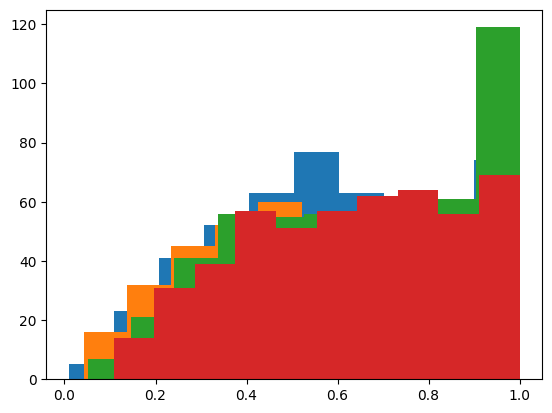

In [135]:
plt.hist(result['Average Dendrite 1 X'])
plt.hist(result['Average Dendrite 2 X'])
plt.hist(result['Average Dendrite 3 X'])
plt.hist(result['Average Dendrite 4 X'])

<Axes: xlabel='Polarization Index 4'>

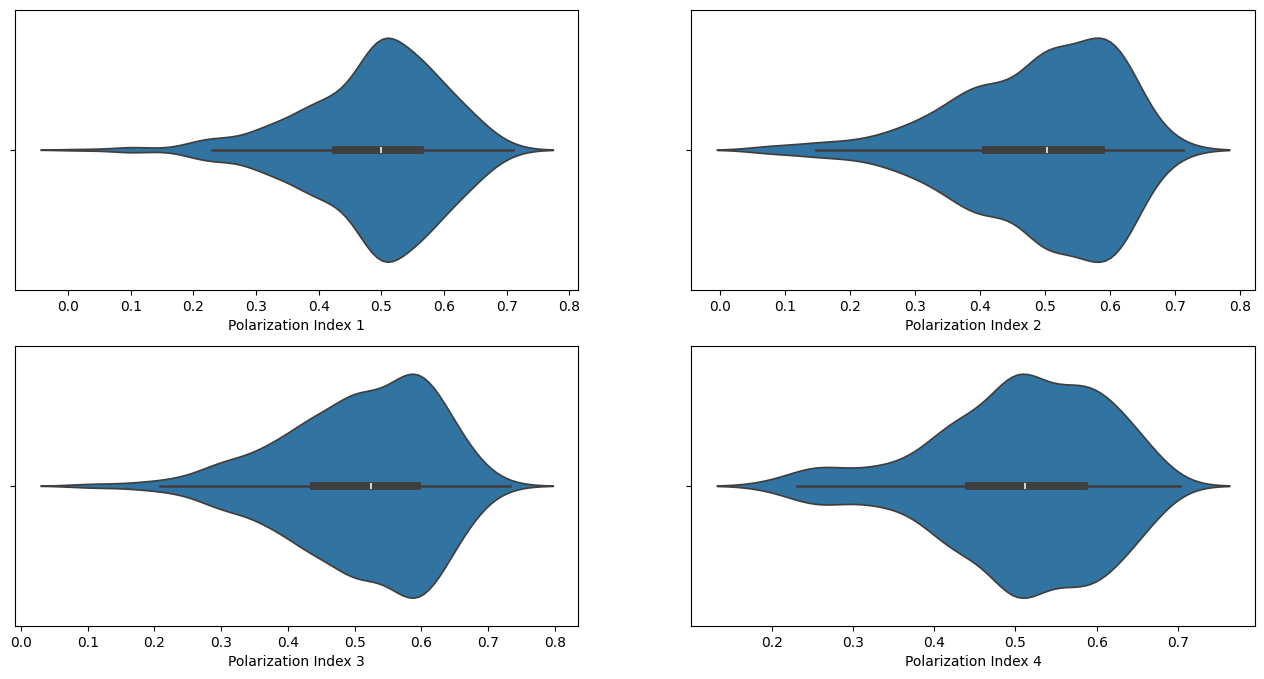

In [156]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
sns.violinplot(data=result, x='Polarization Index 1')
plt.subplot(222)
sns.violinplot(data=result, x='Polarization Index 2')
plt.subplot(223)
sns.violinplot(data=result, x='Polarization Index 3')
plt.subplot(224)
sns.violinplot(data=result, x='Polarization Index 4')

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
sns.violinplot(data=result, x='Average Dendrite 1 X')
plt.subplot(222)
sns.violinplot(data=result, x='Average Dendrite 2 X')
plt.subplot(223)
sns.violinplot(data=result, x='Average Dendrite 3 X')
plt.subplot(224)
sns.violinplot(data=result, x='Average Dendrite 4 X')

#### Heatmaps

<Axes: >

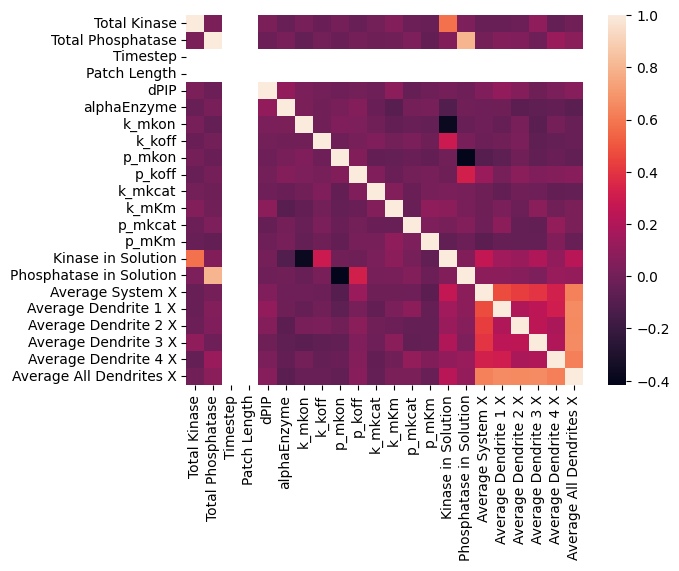

In [137]:
correlation_matrix = lobe_data.corr()
sns.heatmap(data=correlation_matrix)

<Axes: >

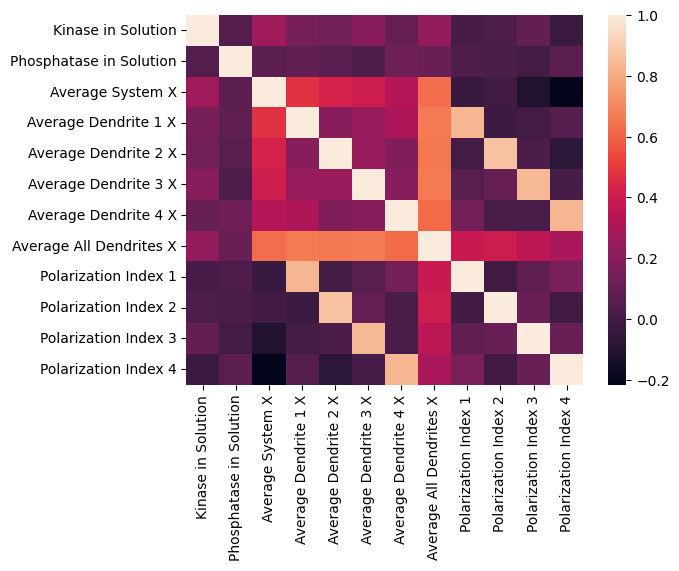

In [138]:
correlation_matrix = result.corr()
sns.heatmap(data=correlation_matrix)

<Axes: >

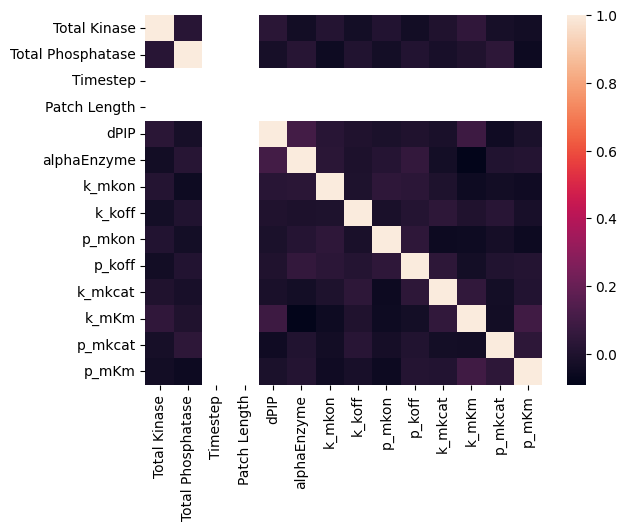

In [139]:
correlation_matrix = params.corr()
sns.heatmap(data=correlation_matrix)

#### Scatter plots

<Axes: xlabel='p_koff', ylabel='Phosphatase in Solution'>

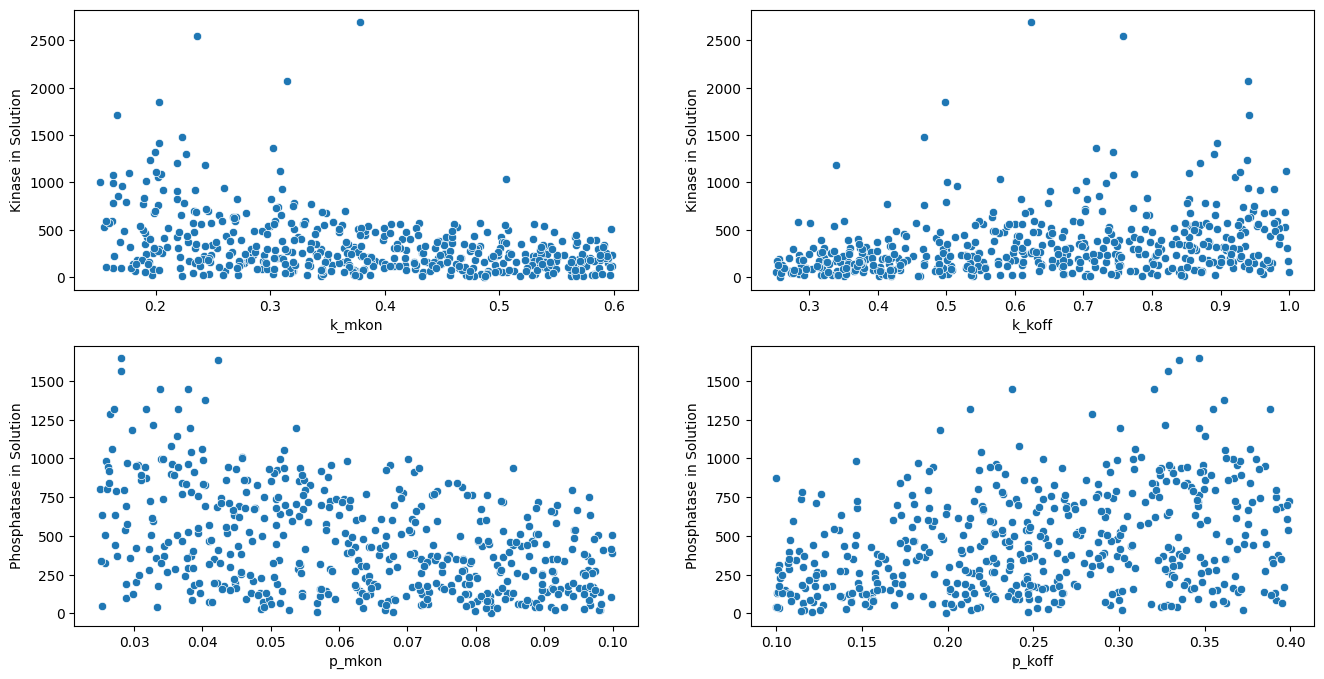

In [140]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
sns.scatterplot(x=params['k_mkon'], y=result['Kinase in Solution'])
plt.subplot(222)
sns.scatterplot(x=params['k_koff'], y=result['Kinase in Solution'])
plt.subplot(223)
sns.scatterplot(x=params['p_mkon'], y=result['Phosphatase in Solution'])
plt.subplot(224)
sns.scatterplot(x=params['p_koff'], y=result['Phosphatase in Solution'])

## Feature Engineering

In [141]:
polarization = result.copy().iloc[:, 8:13]
polarization.head()

,Polarization Index 1,Polarization Index 2,Polarization Index 3,Polarization Index 4
0,0.491317,0.574141,0.423250,0.328203
1,0.478503,0.543420,0.369825,0.249366
2,0.469326,0.536486,0.362668,0.245180
3,0.462694,0.518131,0.369338,0.249352
4,0.468809,0.517050,0.364776,0.255547


In [151]:
for i in range(4):
    polarization['Dendrite ' + str(i + 1) + ' is Polarized'] = polarization['Polarization Index ' + str(i + 1)] > 0.6
polarization.head()

,Polarization Index 1,Polarization Index 2,Polarization Index 3,Polarization Index 4,Dendrite 1 is Polarized,Dendrite 2 is Polarized,Dendrite 3 is Polarized,Dendrite 4 is Polarized,Number of Polarized Dendrite
0,0.491317,0.574141,0.423250,0.328203,False,False,False,False,0
1,0.478503,0.543420,0.369825,0.249366,False,False,False,False,0
2,0.469326,0.536486,0.362668,0.245180,False,False,False,False,0
3,0.462694,0.518131,0.369338,0.249352,False,False,False,False,0
4,0.468809,0.517050,0.364776,0.255547,False,False,False,False,0


In [152]:
v = []
for i in range(4):
    v.append(polarization['Dendrite ' + str(i + 1) + ' is Polarized'].mean())
print(v)

[0.138, 0.202, 0.22, 0.198]


In [153]:
# If you have many dendrite columns, use column selection
dendrite_cols = [f'Dendrite {i} is Polarized' for i in range(1, 5)]
polarization['Number of Polarized Dendrite'] = polarization[dendrite_cols].sum(axis=1)
polarization.head()

,Polarization Index 1,Polarization Index 2,Polarization Index 3,Polarization Index 4,Dendrite 1 is Polarized,Dendrite 2 is Polarized,Dendrite 3 is Polarized,Dendrite 4 is Polarized,Number of Polarized Dendrite
0,0.491317,0.574141,0.423250,0.328203,False,False,False,False,0
1,0.478503,0.543420,0.369825,0.249366,False,False,False,False,0
2,0.469326,0.536486,0.362668,0.245180,False,False,False,False,0
3,0.462694,0.518131,0.369338,0.249352,False,False,False,False,0
4,0.468809,0.517050,0.364776,0.255547,False,False,False,False,0


In [154]:
polarization.describe()

,Polarization Index 1,Polarization Index 2,Polarization Index 3,Polarization Index 4,Number of Polarized Dendrite
count,500.000000,500.000000,500.000000,500.000000,500.0000
mean,0.487528,0.488802,0.509026,0.505658,0.7580
std,0.110371,0.123450,0.111956,0.105207,0.9017
min,0.019770,0.066216,0.093784,0.193075,0.0000
25%,0.427593,0.409489,0.438612,0.442658,0.0000
50%,0.500000,0.503633,0.525224,0.511857,0.0000
75%,0.561815,0.585522,0.594126,0.583887,1.0000
max,0.709793,0.712091,0.732559,0.702549,4.0000


<Axes: xlabel='Number of Polarized Dendrite', ylabel='Count'>

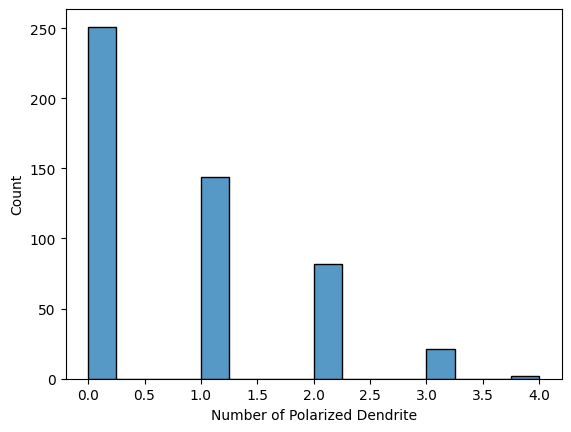

In [155]:
sns.histplot(x=polarization['Number of Polarized Dendrite'])